In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import joblib


In [2]:
df_model = pd.read_csv("../data/processed/bina_rent_model.csv")

print("Shape:", df_model.shape)
df_model.head()


Shape: (14113, 11)


,rooms,area_m2,floor_current,floor_total,price,district,floor_ratio,building_type_enc,is_baku,district_freq,district_target_enc
0,4,105,9,17,580,Xırdalan,0.529412,1,0,334,459.200599
1,1,50,17,17,549,20 Yanvar m.,1.000000,1,1,620,771.066129
2,3,80,3,5,699,Gənclik m.,0.600000,0,1,521,966.310940
3,2,50,1,2,800,Nizami m.,0.500000,0,1,752,1187.590426
4,3,90,9,12,750,Koroğlu m.,0.750000,1,1,43,915.581395


In [3]:
X = df_model.drop(columns=["price"])
y = df_model["price"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(11290, 10) (2823, 10)


In [5]:
district_mean = y_train.groupby(X_train["district"]).mean()

X_train["district_target_enc"] = X_train["district"].map(district_mean)
X_test["district_target_enc"] = X_test["district"].map(district_mean)

X_test["district_target_enc"] = X_test["district_target_enc"].fillna(y_train.mean())

X_train.drop(columns=["district"], inplace=True)
X_test.drop(columns=["district"], inplace=True)


In [6]:
rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=18,
    min_samples_leaf=4,
    min_samples_split=6,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",18
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",6
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [7]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


In [8]:
def eval_metrics(y_true, y_pred, name=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.3f}")

eval_metrics(y_train, y_pred_train, "Train RF")
eval_metrics(y_test, y_pred_test, "Test RF")


Train RF → MAE: 104.77 | RMSE: 168.95 | R2: 0.862
Test RF → MAE: 140.37 | RMSE: 222.88 | R2: 0.759


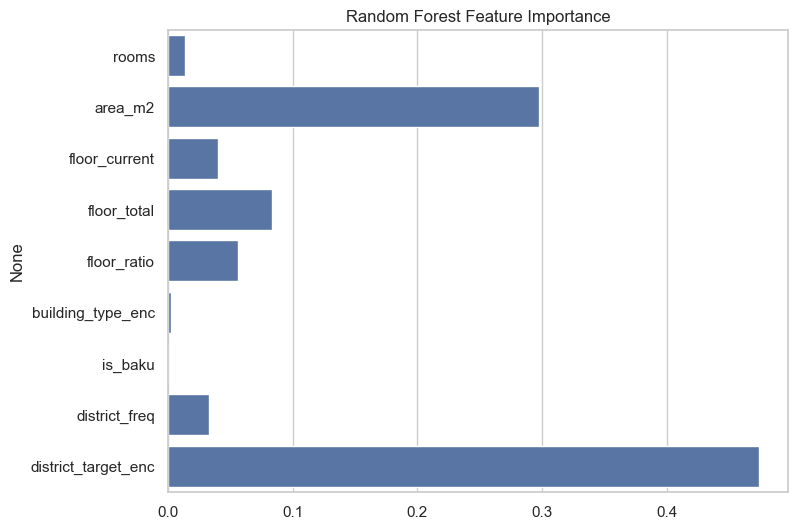

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=rf_model.feature_importances_,
    y=X_train.columns
)
plt.title("Random Forest Feature Importance")
plt.show()


In [10]:
joblib.dump(rf_model, "../models/random_forest_model.joblib")
print("Random Forest model saxlanıldı")


Random Forest model saxlanıldı
